In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [134]:
df=pd.read_excel(r"D:\Users\abhisv\Desktop\purchased_dataset.csv.xlsx")

In [135]:
df.shape

(400, 5)

In [136]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [137]:
df.drop('User ID',axis=1,inplace=True)

In [138]:
gender_dummy=pd.get_dummies(df.Gender,drop_first=True)

In [139]:
df=pd.concat([df,gender_dummy],axis=1)

In [140]:
df.drop('Gender',axis=1,inplace=True)

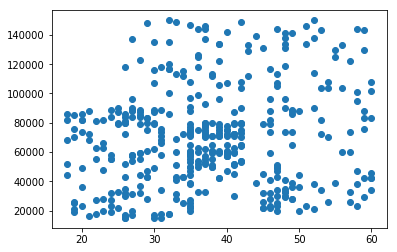

In [141]:
plt.scatter(df['Age'],(df['EstimatedSalary']))

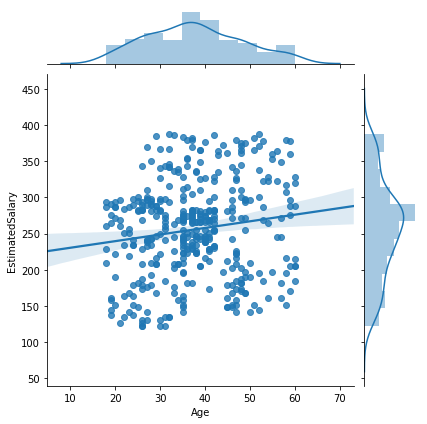

In [142]:
sns.jointplot(df['Age'],np.sqrt(df['EstimatedSalary']),kind='reg')

In [143]:
df['EstimatedSalary']=np.log(df['EstimatedSalary'])

In [144]:
y=pd.DataFrame(df['Purchased'])
x=df[['Age','Male','EstimatedSalary']]

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [146]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 3), (120, 3), (280, 1), (120, 1))

In [147]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_train_pred=lr.predict_proba(x_train)
print('Logistic roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=lr.predict_proba(x_test)
print('Logistic roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

Logistic roc-auc: 0.826827880512091
Logistic roc-auc: 0.8700810185185185


In [148]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_train_pred=rf.predict_proba(x_train)
print('random roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=rf.predict_proba(x_test)
print('random roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

random roc-auc: 0.9998293029871976
random roc-auc: 0.908130787037037


In [149]:
#Selecting the best threshold for maximum accuarcy
pred=[]
for model in [lr]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_pred=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.8700810185185185


In [150]:
fpr, tpr, thresholds = roc_curve(y_test, final_pred)
thresholds

array([1.9393107 , 0.9393107 , 0.80926542, 0.76222182, 0.71978143,
       0.68611913, 0.67017988, 0.6675083 , 0.60314202, 0.58252083,
       0.56551691, 0.53899935, 0.5376453 , 0.49209125, 0.47171486,
       0.46462695, 0.45151029, 0.43886672, 0.4347948 , 0.43093394,
       0.41872271, 0.41637846, 0.32910138, 0.30563935, 0.29205403,
       0.28589005, 0.28341809, 0.28204033, 0.22632465, 0.21709951,
       0.21214381, 0.20552322, 0.15076128, 0.11941759, 0.07847043,
       0.07473343, 0.02140935])

In [151]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
    y_pred=np.where(final_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns=['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)

In [152]:
accuracy_ls.head()

,threshold,accuracy
19,0.430934,0.825
17,0.438867,0.825
15,0.464627,0.825
13,0.492091,0.825
8,0.603142,0.825


In [153]:
#So choose 0.4 as threshold

In [124]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

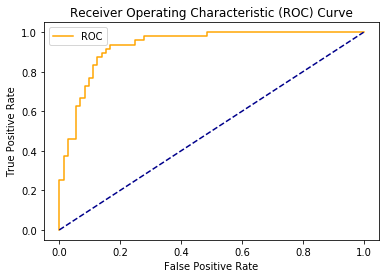

In [125]:
plot_roc_curve(fpr, tpr)

In [156]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 1, 71],
       [ 0, 48]], dtype=int64)